# <font color=blue>Assignments for "Feature Engineering - Part 1"</font>

In this assignment, you will continue to study the data of the `US Education System` ([dataset](https://www.kaggle.com/spscientist/students-performance-in-exams/home)). In this dataset, there is a lot of data on an annual basis. You can reach the explanations of this data from Kaggle again.

To complete this assignment, submit the Github link of the Jupyter notebook file containing solutions to the questions below. You can talk to your mentor on your head or ask Slack at office time.

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
students = pd.read_csv("E:/user/Notebooks/data/StudentsPerformance.csv")
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


**(1)** Are the exam scores (math, reading, writing) normally distributed? If not, what can we do to have a normal distribution?

In [30]:
from scipy.stats.mstats import winsorize
import numpy as np
students.dropna(inplace=True)
students['math score']= winsorize(np.array(students['math score'].dropna()), (0.008, 0))
students['reading score']=winsorize(np.array(students['reading score'].dropna()), (0.006, 0))
students['writing score']=winsorize(np.array(students['writing score'].dropna()), (0.005, 0))

In [31]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

pd.options.display.float_format = '{:.5f}'.format

variables =['reading score','writing score','math score']
distribution_tests = pd.DataFrame(columns=['variable', 'jarque_bera_stats', 'jarque_bera_p_value', 
                                         'normal_stats', 'normal_p_value'])

for variable in variables:
    jb_stats = jarque_bera(students[variable])
    norm_stats = normaltest(students[variable])
    distribution_tests = distribution_tests.append({"variable": variable,
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1] ,
                                                "normal_stats": norm_stats[0] , 
                                                "normal_p_value" : norm_stats[1]
                                               }, ignore_index=True)
distribution_tests

,variable,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,reading score,9.76094,0.00759,10.10159,0.00640
1,writing score,11.64095,0.00297,12.66339,0.00178
2,math score,5.71205,0.05750,5.95534,0.05091


 at 5% confidence interval they are not normally distributed except math score

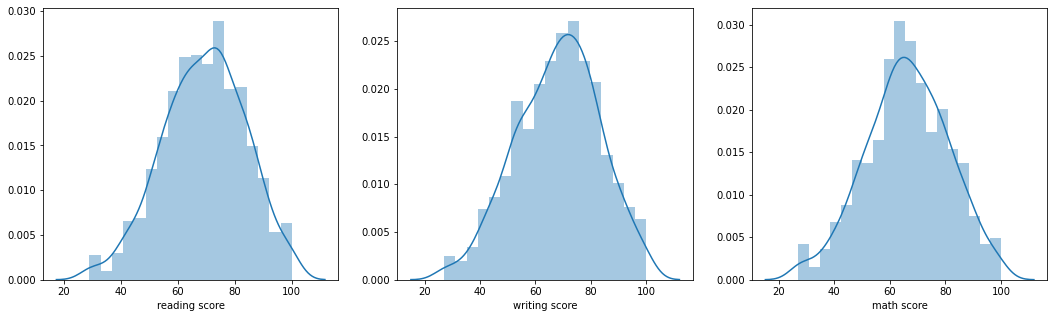

In [32]:
from scipy.stats import norm
import seaborn as sns

scores=students[['reading score','writing score','math score']]


plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.distplot(students['reading score'])


plt.subplot(1,3,2)
sns.distplot(students['writing score'])

plt.subplot(1,3,3)
sns.distplot(students['math score']);


In [33]:
from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale
students['reading score'] = normalize(np.array(students['reading score']).reshape(1,-1)).reshape(-1,1)
students['reading score']=scale(students['reading score'])
students['writing score'] = normalize(np.array(students['writing score']).reshape(1,-1)).reshape(-1,1)
students['writing score'] =scale(students['writing score'] )
normal_features=["writing score","reading score"]


print('Minimum Value\n-----------------',)
print(students[normal_features].min())
print('\nMaximum Value\n-----------------',)
print(students[normal_features].max())

Minimum Value
-----------------
writing score   -2.73176
reading score   -2.77320
dtype: float64

Maximum Value
-----------------
writing score   2.12027
reading score   2.12462
dtype: float64


**(2)** We want to keep the three exam results in one variable, as the target variable. To do this, define a new variable containing the average of the three exams. Test whether the average of this new variable is normally distributed. If it does not have a normal distribution, try to make it normally distributed by transforming and test the result of the transformation.

In [34]:
pd.options.display.float_format = '{:.15f}'.format
for var in ["winsorize_gross", "winsorize_duration", "winsorize_num_critic_for_reviews"]:
    comparison = pd.DataFrame(columns=['group_1', 'group_2','statistic', 'p_value'])
    print("For the sake of comparison {}".format(var),end='')
    for i in range(0, len(movies)):
        for j in range(i+1, len(movies)):
            ttest = stats.ttest_ind(movie[movie["color"]==movies[i]][var], 
                                movie[movie["color"]==movies[j]][var])
            group_1 = movies[i]
            group_2 = movies[j]
            statistic = ttest[0]
            p_value = ttest[1]
            
            comparison = comparison.append({"group_1" : group_1 ,
                                                  "group_2" : group_2 ,
                                                  "statistic": statistic , 
                                                  "p_value" : p_value}, ignore_index=True)
    display(comparison)

,variable,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,average score,6.20185,0.04501,6.36364,0.04151


 at 1% confidence interval new variable is normally distributed

**(3)** Which variables seem to be related to the target variable we created in the previous question? If our goal was to explain the factors that determine the success of the exam, which variables should we keep in our data set?

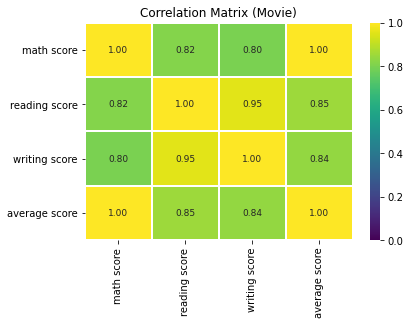

In [35]:

s_corr=students.corr()
sns.heatmap(s_corr, annot=True, fmt='.2f', annot_kws={"size": 9}, linewidths=.8, vmin=0, vmax=1, cmap='viridis')
plt.title("Correlation Matrix (Movie)")

plt.show()

math score and average score completely same, we can delete math score.Reading and writing score are mostly related with average score so we can keep them.

**(4)** Does the test preparation course have an impact on the target variable you created?

In [36]:
prep =students['test preparation course'].unique()
group = students.groupby('test preparation course')

In [38]:
pd.options.display.float_format = '{:.15f}'.format
import scipy.stats as stats
for var in ['average score']:
    comparison = pd.DataFrame(columns=['group_1', 'group_2','statistic', 'p_value'])
    print("For the sake of comparison {}".format(var),end='')
    for i in range(0, len(prep)):
        for j in range(i+1, len(prep)):
            ttest = stats.ttest_ind(students[students['test preparation course']==prep[i]][var], 
                                students[students['test preparation course']==prep[j]][var])
            group_1 = prep[i]
            group_2 = prep[j]
            statistic = ttest[0]
            p_value = ttest[1]
            
            comparison = comparison.append({"group_1" : group_1 ,
                                                  "group_2" : group_2 ,
                                                  "statistic": statistic , 
                                                  "p_value" : p_value}, ignore_index=True)
    display(comparison)

For the sake of comparison average score

,group_1,group_2,statistic,p_value
0,none,completed,-6.218319550557682,0.000000000737710


at 1%  or 5% confidence interval the test preparation course have an impact on the target variable